# •	Title of the Project: Titanic_EDA_Yashwanth A M

# By Yashwanth A M

# Major Project - ML Part 2

## LOGISTIC REGRESSION

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Input The Data :

In [60]:
data = pd.read_csv('inputfile.csv', index_col=0)

In [61]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,0,0


Since passenger id is independent and is not required in data analysis it can be removed

In [62]:
data=pd.DataFrame(data,columns=[ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
                                'male', 'Q','S','Survived',])
data

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,3,22.000000,1,0,7.2500,1,0,1,0
1,1,38.000000,1,0,71.2833,0,0,0,1
2,3,26.000000,0,0,7.9250,0,0,1,1
3,1,35.000000,1,0,53.1000,0,0,1,1
4,3,35.000000,0,0,8.0500,1,0,1,0
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,1,0
887,1,19.000000,0,0,30.0000,0,0,1,1
888,3,29.642093,1,2,23.4500,0,0,1,0
889,1,26.000000,0,0,30.0000,1,0,0,1


### Defining the Dependent and Independent variables :

#### Here Dependent is y and Independent is x

In [63]:
x=data.iloc[:,:-1].values
print(x.shape)
x

(889, 8)


array([[ 3.       , 22.       ,  1.       , ...,  1.       ,  0.       ,
         1.       ],
       [ 1.       , 38.       ,  1.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 3.       , 26.       ,  0.       , ...,  0.       ,  0.       ,
         1.       ],
       ...,
       [ 3.       , 29.6420927,  1.       , ...,  0.       ,  0.       ,
         1.       ],
       [ 1.       , 26.       ,  0.       , ...,  1.       ,  0.       ,
         0.       ],
       [ 3.       , 32.       ,  0.       , ...,  1.       ,  1.       ,
         0.       ]])

In [64]:
y=data.iloc[:,-1].values
print(y.shape)
y

(889,)


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

### Splitting the data into train and test dataset :

In [65]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=6)

In [66]:
pd.DataFrame([xtrain.shape , xtest.shape  , ytrain.shape  ,  ytest.shape],
        index=['xtrain','xtest','ytrain','ytest'],columns=['row','columns'])

,row,columns
xtrain,666,8.0
xtest,223,8.0
ytrain,666,NaN
ytest,223,NaN


### Scaling the independent variables

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

### Building the Model

In [68]:
from sklearn.linear_model import LogisticRegression 
LR=LogisticRegression()
LR.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
ypred=LR.predict(xtest)
ypred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [70]:
ytest


array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

### Model evaluation using confusion matrix

In [71]:
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(ytest,ypred)
print(cmat)
TP=cmat[1,1]
TN=cmat[0,0]
FP=cmat[0,1]
FN=cmat[1,0]
pd.DataFrame([TP,TN,FP,FN],index=['TP','TN','FP','FN'])

[[117  16]
 [ 27  63]]


,0
TP,63
TN,117
FP,16
FN,27


### Confusion Matrix parameters

#### 1. Classification accuracy

In [72]:
from sklearn import metrics as met
accuracy=met.accuracy_score(ytest,ypred)
print("classification accuracy:",accuracy*100)

classification accuracy: 80.71748878923766


#### 2. Classification error

In [73]:
print("classification error is :",100*(1-accuracy))

classification error is : 19.282511210762333


#### 3. TPR-True positive rate, TNR-True negative rate, FPR-False positive rate, FNR-False negative rate

In [74]:
TPR=100*met.recall_score(ytest,ypred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR

pd.DataFrame([TPR,TNR,FPR,FNR],index=['TPR/SENSITIVITY',
                                      'TNR/SPECIFICITY','FPR','FNR'])

,0
TPR/SENSITIVITY,70.000000
TNR/SPECIFICITY,87.969925
FPR,12.030075
FNR,30.000000


In [75]:
from sklearn.metrics import precision_score,f1_score,roc_auc_score
precision=precision_score(ytest,ypred)
f1=f1_score(ytest,ypred)
roc_auc=roc_auc_score(ytest,ypred)
pd.DataFrame([precision,f1,roc_auc],index=['precision','F1_score','roc_auc'])

,0
precision,0.797468
F1_score,0.745562
roc_auc,0.789850


Here accuracy of the model is 80.71% for test split size for 25%

## KNN Classifier

Another method for computation is KNN Classifier

### Split the data into train and test :

In [76]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=5)

In [77]:
pd.DataFrame([xtrain.shape , xtest.shape  , ytrain.shape  ,  ytest.shape],
     index=['xtrain','xtest','ytrain','ytest'],columns=['row','columns'])

,row,columns
xtrain,666,8.0
xtest,223,8.0
ytrain,666,NaN
ytest,223,NaN


### Scaling the independent variables

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

### Building the model

To choose the value of K 

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [80]:
ypred=knn.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [81]:
ytest

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

Text(0, 0.5, 'mean error')

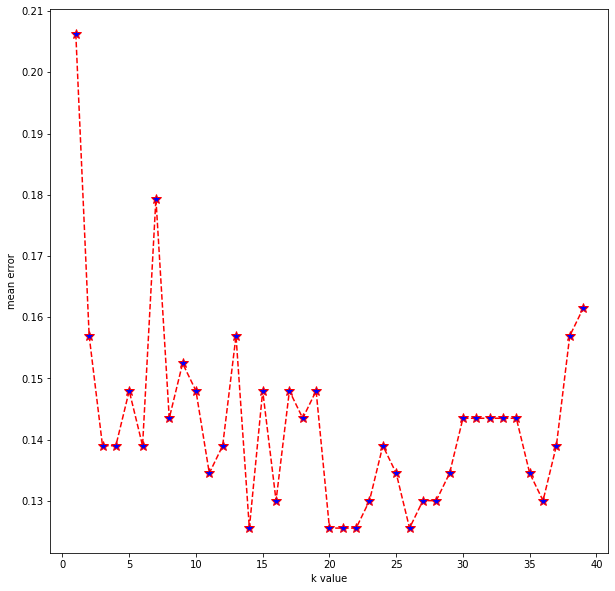

In [82]:
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    yp=knn.predict(xtest)
    error.append(np.mean(yp!=ytest))
error
plt.figure(figsize=(10,10))
plt.plot(range(1,40),error,color='r',linestyle='dashed',marker='*',
         markerfacecolor='b',markersize='10')
plt.xlabel('k value')
plt.ylabel('mean error')

In [83]:
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(ytest,ypred)
print(cmat)
TP=cmat[1,1]
TN=cmat[0,0]
FP=cmat[0,1]
FN=cmat[1,0]
pd.DataFrame([TP,TN,FP,FN],index=['TP','TN','FP','FN'])

[[138  10]
 [ 18  57]]


,0
TP,57
TN,138
FP,10
FN,18


#### Confusion matrix parameters


#### 1. Classification accuracy :

In [84]:
from sklearn import metrics as met
accuracy=met.accuracy_score(ytest,ypred)
print("classification accuracy:",accuracy*100)


classification accuracy: 87.4439461883408


#### 2 .Classification error :

In [85]:
print("classification error is :",100*(1-accuracy))

classification error is : 12.556053811659195


In [86]:
TPR=100*met.recall_score(ytest,ypred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR

pd.DataFrame([TPR,TNR,FPR,FNR],
             index=['TPR/SENSITIVITY','TNR/SPECIFICITY','FPR','FNR'])

,0
TPR/SENSITIVITY,76.000000
TNR/SPECIFICITY,93.243243
FPR,6.756757
FNR,24.000000


In [87]:
from sklearn.metrics import precision_score,f1_score,roc_auc_score
precision=precision_score(ytest,ypred)
f1=f1_score(ytest,ypred)
roc_auc=roc_auc_score(ytest,ypred)
pd.DataFrame([precision,f1,roc_auc],index=['precision','F1_score','roc_auc'])

,0
precision,0.850746
F1_score,0.802817
roc_auc,0.846216


### Here accuracy is 87.44% having the test size of 25 percentile

1 - 0.9444444444444444


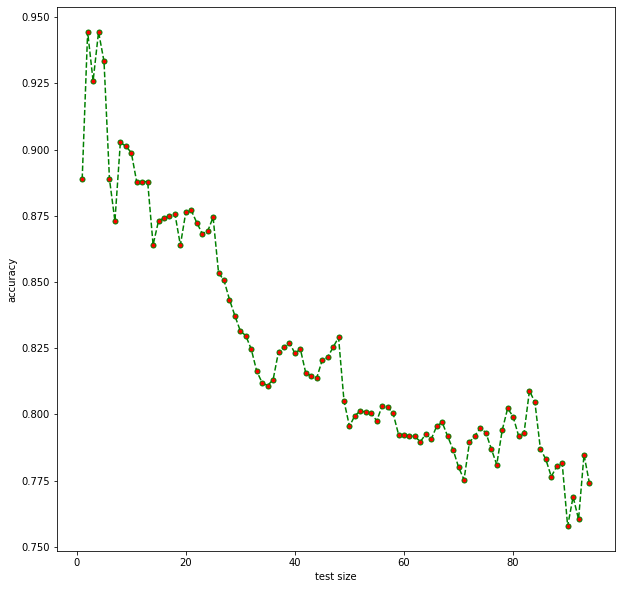

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as met
from sklearn.neighbors import KNeighborsClassifier
acc=[]
for i in range(1,95,1):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=i/100,
                                               random_state=5)
    scaler=StandardScaler()
    xtrain=scaler.fit_transform(xtrain)
    xtest=scaler.transform(xtest)
    knn=KNeighborsClassifier(n_neighbors=21)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    accuracy=met.accuracy_score(ytest,ypred)
    acc.append(accuracy)
plt.figure(figsize=(10,10))
plt.plot(range(1,95,1),acc,color='g',linestyle='dashed',
         marker='.',markerfacecolor='r',markersize='10')
plt.xlabel('test size')
plt.ylabel('accuracy')
print(acc.index(max(acc)),'-',max(acc))

Let's move on to the next method.

## DECISION TREE CLASSIFIER

### Splitting the data into train and test split

In [89]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=5)

In [90]:
pd.DataFrame([xtrain.shape , xtest.shape  , ytrain.shape  , ytest.shape],
    index=['xtrain','xtest','ytrain','ytest'],columns=['row','columns'])

,row,columns
xtrain,666,8.0
xtest,223,8.0
ytrain,666,NaN
ytest,223,NaN


### Scaling the independent variables

In [91]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [92]:
xtrain

array([[-0.37215317,  0.37846399, -0.48303394, ..., -1.31937134,
        -0.30593473,  0.62249498],
       [ 0.81945266, -1.55507852,  0.42829922, ...,  0.75793673,
        -0.30593473,  0.62249498],
       [-0.37215317, -0.16292791,  0.42829922, ..., -1.31937134,
        -0.30593473, -1.60643866],
       ...,
       [ 0.81945266, -0.85900321, -0.48303394, ..., -1.31937134,
        -0.30593473, -1.60643866],
       [ 0.81945266, -0.24026961, -0.48303394, ...,  0.75793673,
        -0.30593473, -1.60643866],
       [ 0.81945266, -1.94178702,  0.42829922, ...,  0.75793673,
        -0.30593473,  0.62249498]])

In [93]:
xtest

array([[ 0.81945266, -0.39495301, -0.48303394, ...,  0.75793673,
        -0.30593473,  0.62249498],
       [ 0.81945266, -0.08558621, -0.48303394, ...,  0.75793673,
        -0.30593473,  0.62249498],
       [-1.563759  ,  1.5385895 ,  0.42829922, ...,  0.75793673,
        -0.30593473, -1.60643866],
       ...,
       [-0.37215317,  0.37846399, -0.48303394, ..., -1.31937134,
        -0.30593473,  0.62249498],
       [ 0.81945266, -0.62697811, -0.48303394, ...,  0.75793673,
        -0.30593473,  0.62249498],
       [-0.37215317,  0.14643889,  0.42829922, ..., -1.31937134,
        -0.30593473,  0.62249498]])

### Building the model

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [95]:
ypred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [96]:
ytest

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

### Model evaluation using confusion matrix

In [97]:
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(ytest,ypred)
print(cmat)
TP=cmat[1,1]
TN=cmat[0,0]
FP=cmat[0,1]
FN=cmat[1,0]
pd.DataFrame([TP,TN,FP,FN],index=['TP','TN','FP','FN'])

[[130  18]
 [ 22  53]]


,0
TP,53
TN,130
FP,18
FN,22


### Confusion matrix parameters

#### 1. Classification accuracy :

In [98]:
from sklearn import metrics as met
accuracy=met.accuracy_score(ytest,ypred)
print("classification accuracy:",accuracy*100)

classification accuracy: 82.0627802690583


#### 2. Classification error

In [99]:
print("classification error is :",100*(1-accuracy))

classification error is : 17.9372197309417


#### 3. a)TPR( true positive rate)      b)TNR(true negative rate)
#### c) FPR(false positive rate)      d) FNR(false negative rate)

In [100]:
TPR=100*met.recall_score(ytest,ypred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR

pd.DataFrame([TPR,TNR,FPR,FNR],
             index=['TPR/SENSITIVITY','TNR/SPECIFICITY','FPR','FNR'])

,0
TPR/SENSITIVITY,70.666667
TNR/SPECIFICITY,87.837838
FPR,12.162162
FNR,29.333333


In [101]:
from sklearn.metrics import precision_score,f1_score,roc_auc_score
precision=precision_score(ytest,ypred)
f1=f1_score(ytest,ypred)
roc_auc=roc_auc_score(ytest,ypred)
pd.DataFrame([precision,f1,roc_auc],index=['precision','F1_score','roc_auc'])

,0
precision,0.746479
F1_score,0.726027
roc_auc,0.792523


### The accuracy of this model is 83.408% for the given test split of 25% and random state=5

3 - 0.8888888888888888


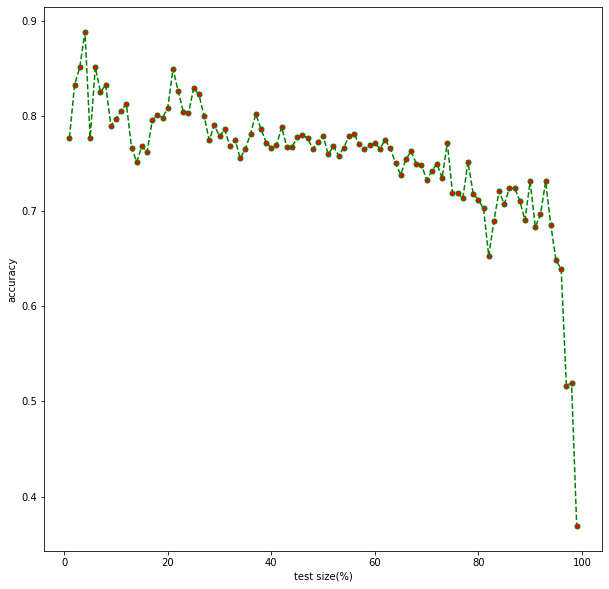

In [102]:
# finding the best values of accuracy by varying test size
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as met
from sklearn.tree import DecisionTreeClassifier
acc=[]
for i in range(1,100,1):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=i/100,
                                               random_state=5)
    scaler=StandardScaler()
    xtrain=scaler.fit_transform(xtrain)
    xtest=scaler.transform(xtest)
    dt=DecisionTreeClassifier()
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    accuracy=met.accuracy_score(ytest,ypred)
    acc.append(accuracy)
plt.figure(figsize=(10,10))
plt.plot(range(1,100,1),acc,color='g',linestyle='dashed',
         marker='.',markerfacecolor='r',markersize='10')
plt.xlabel('test size(%)')
plt.ylabel('accuracy')
print(acc.index(max(acc)),'-',max(acc))

Plotting for various values of test size gives accuracy maximum for test size of 0.25 with deviation of +/- 0.01,for a given randomly selected samples

## RANDOM FOREST CLASSIFIER

The last method

### Splitting the data into train and test split :

In [103]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=6)

In [104]:
pd.DataFrame([xtrain.shape , xtest.shape  , ytrain.shape  ,  ytest.shape],
    index=['xtrain','xtest','ytrain','ytest'],columns=['row','columns'])

,row,columns
xtrain,666,8.0
xtest,223,8.0
ytrain,666,NaN
ytest,223,NaN


### Scaling the independent variables :

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [106]:
xtrain

array([[-1.5503793 ,  0.02068025, -0.48902274, ...,  0.72149009,
        -0.29704426,  0.63877526],
       [ 0.82057963, -2.06762908,  3.32020699, ...,  0.72149009,
        -0.29704426,  0.63877526],
       [-0.36489984,  2.32186554, -0.48902274, ...,  0.72149009,
        -0.29704426,  0.63877526],
       ...,
       [-0.36489984, -0.26480093, -0.48902274, ...,  0.72149009,
        -0.29704426,  0.63877526],
       [-0.36489984, -0.8918716 , -0.48902274, ...,  0.72149009,
        -0.29704426,  0.63877526],
       [-0.36489984,  1.77317871, -0.48902274, ...,  0.72149009,
        -0.29704426,  0.63877526]])

In [107]:
xtest

array([[ 0.82057963,  0.67580506, -0.48902274, ...,  0.72149009,
        -0.29704426,  0.63877526],
       [ 0.82057963,  0.44065356, -0.48902274, ...,  0.72149009,
        -0.29704426,  0.63877526],
       [-1.5503793 ,  0.0487344 , -0.48902274, ..., -1.38602043,
        -0.29704426, -1.56549583],
       ...,
       [ 0.82057963, -0.6567201 , -0.48902274, ...,  0.72149009,
        -0.29704426,  0.63877526],
       [ 0.82057963, -1.28379076, -0.48902274, ..., -1.38602043,
        -0.29704426, -1.56549583],
       [-1.5503793 , -0.4215686 , -0.48902274, ..., -1.38602043,
        -0.29704426, -1.56549583]])

### Building the model :

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,n_jobs=10,random_state=6)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [109]:
ypred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [110]:
ytest

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

### Model evaluation using confusion matrix :

In [111]:
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(ytest,ypred)
print(cmat)
TP=cmat[1,1]
TN=cmat[0,0]
FP=cmat[0,1]
FN=cmat[1,0]
pd.DataFrame([TP,TN,FP,FN],index=['TP','TN','FP','FN'])

[[115  18]
 [ 22  68]]


,0
TP,68
TN,115
FP,18
FN,22


### Confusion matrix parameters :

#### 1. Classification accuracy :

In [112]:
from sklearn import metrics as met
accuracy=met.accuracy_score(ytest,ypred)
print("classification accuracy:",accuracy*100)

classification accuracy: 82.0627802690583


#### 2. Classification error :

In [113]:
print("classification error is :",100*(1-accuracy))

classification error is : 17.9372197309417


#### 3. a)TPR( true positive rate) b)TNR(true negetive rate)
#### c) FPR(false positive rate) d) FNR(false negetive rate)

In [114]:
TPR=100*met.recall_score(ytest,ypred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR
pd.DataFrame([TPR,TNR,FPR,FNR],index=['TPR/SENSITIVITY','TNR/SPECIFICITY',
                                      'FPR','FNR'])

,0
TPR/SENSITIVITY,75.555556
TNR/SPECIFICITY,86.466165
FPR,13.533835
FNR,24.444444


In [115]:
from sklearn.metrics import precision_score,f1_score,roc_auc_score
precision=precision_score(ytest,ypred)
f1=f1_score(ytest,ypred)
roc_auc=roc_auc_score(ytest,ypred)
pd.DataFrame([precision,f1,roc_auc],index=['precision','F1_score','roc_auc'])

,0
precision,0.790698
F1_score,0.772727
roc_auc,0.810109


### The accuracy of this model is 82.06% for the given test split of 25% and random state=6

0 - 0.8888888888888888


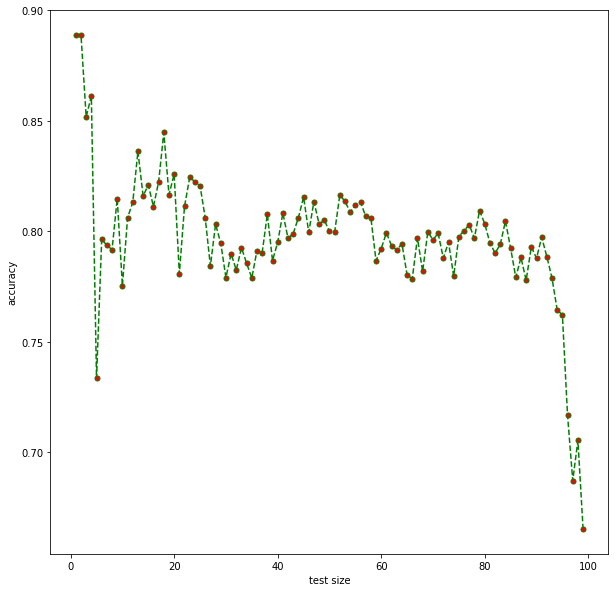

In [116]:
# plot of accuracy for various values of test size
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as met
from sklearn.ensemble import RandomForestClassifier
acc=[]
for i in range(1,100,1):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=i/100,
                                               random_state=6)
    scaler=StandardScaler()
    xtrain=scaler.fit_transform(xtrain)
    xtest=scaler.transform(xtest)
    rf=RandomForestClassifier(n_estimators=50,n_jobs=10,random_state=6)
    rf.fit(xtrain,ytrain)
    ypred=rf.predict(xtest)
    accuracy=met.accuracy_score(ytest,ypred)
    acc.append(accuracy)
plt.figure(figsize=(10,10))
plt.plot(range(1,100,1),acc,color='g',linestyle='dashed',
         marker='.',markerfacecolor='r',markersize='10')
plt.xlabel('test size')
plt.ylabel('accuracy')
print(acc.index(max(acc)),'-',max(acc))

### From the above graph it is clear that accuracy can have maximum of 88.88%

## INFERENCE :

### From the above classification models, KNN classifier gave highest accuracy of 87.44 percentile on randomly selected samples for a given test split.


### Depending on the training which inturn depends on samples which are get selected the model may perform well or not and therefore model should be run for various test sizes and mean accuracy should be considered.